### Integrantes del grupo
* Carlos Madrid Urbano
* Alejandro Pérez Sanjuán

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_sample_images
from skimage.metrics import peak_signal_noise_ratio
from skimage.data import astronaut, coffee, cat, rocket, binary_blobs, brain, clock
from utils import (
    add_noise,
    mean_filter,
    median_filter,
    add_salt_pepper,
    adaptive_median_filter,
    fourier_transform_denoising,
)

In [2]:
# ignore Numba warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = load_sample_images()
building, flower = dataset['images'][0], dataset['images'][1]
images = [astronaut(), coffee(), cat(), rocket(), building, flower]

## Introducción
En este documento se presenta una breve review de diferentes filtros espaciales utilizados en procesamiento de imagen.

...

## Filtros espaciales
Hemos encontrado dos papers de review/survey que sumarizan los filtros más comunes utilizados en el campo del procesamiento de imagenes. En general, se mencionan dos tipos de ruidos:

* Sal y pimienta
* Ruido gausiano

Para el ruido `sal y pimienta` se suelen considerar filtros espaciales como los descritos a continuación:
* **Filtro de media.** El píxel considerado se sustituye por la media de sus vecinos. La operación se aplica en ventana deslizante.
* **Filtro de mediana.** El píxel considerado se sustituye por la mediana de sus vecinos. La operación se aplica en ventana deslizante.
* Filtro de mediana adaptativo.
* **Gaussian smoothing.** Aplica una operación de convolución con un kernel gausiano para eliminar ruido. Como contrapartida, el Kernel también elimina detalles.
* Convervative filter
* **Filtros de frecuencia.** La transformada de Fourier es un ejemplo. Se llevan los datos de las imágenes al dominio frecuencial y se eliminan las frecuencias considerando un sesgo. Posteriormente, se aplica la transformada inversa de Fourier para volver al espacio inicial.

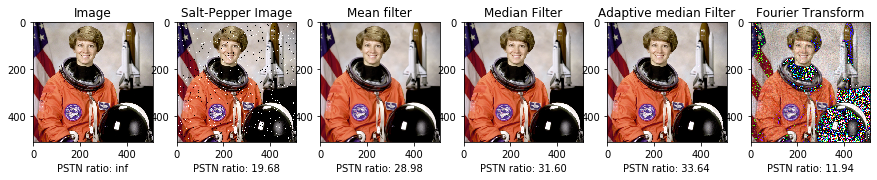

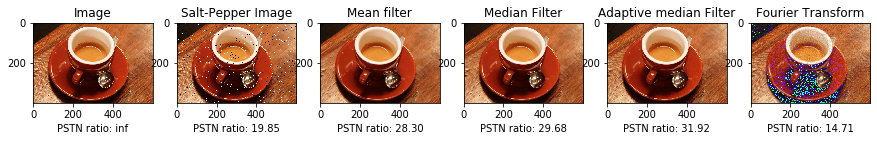

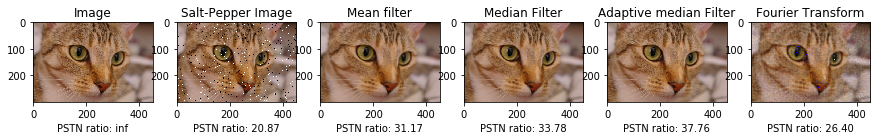

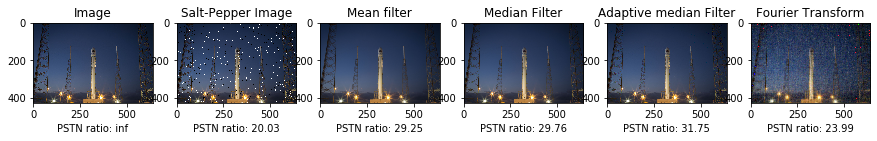

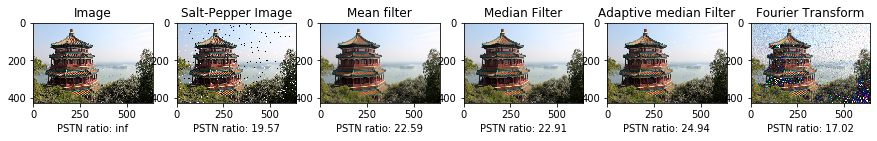

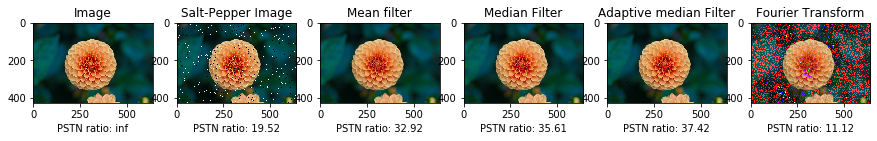

In [4]:
for img in images:
    fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,10))
    
    noisy = add_salt_pepper(image=img, prob=0.03)
    
    ax[0].imshow(img)
    ax[0].set_title('Image')
    ax[0].set_xlabel(f'PSTN ratio: inf')
    
    ax[1].imshow(noisy)
    ax[1].set_title('Salt-Pepper Image')
    ax[1].set_xlabel(f"PSTN ratio: {peak_signal_noise_ratio(image_true=img, image_test=noisy):0.2f}")
    
    mean = mean_filter(img)
    ax[2].imshow(mean)
    ax[2].set_title('Mean filter')
    ax[2].set_xlabel(f"PSTN ratio: {peak_signal_noise_ratio(image_true=img, image_test=mean):0.2f}")
    
    median = median_filter(noisy)
    ax[3].imshow(median)
    ax[3].set_title('Median Filter')
    ax[3].set_xlabel(f"PSTN ratio: {peak_signal_noise_ratio(image_true=img, image_test=median):0.2f}")
    
    ad_median = adaptive_median_filter(noisy)
    ax[4].imshow(ad_median)
    ax[4].set_title('Adaptive median Filter')
    ax[4].set_xlabel(f"PSTN ratio: {peak_signal_noise_ratio(image_true=img, image_test=ad_median):0.2f}")
    
    fft = fourier_transform_denoising(noisy, n_components=1000)
    ax[5].imshow(fft)
    ax[5].set_title('Fourier Transform')
    ax[5].set_xlabel(f"PSTN ratio: {peak_signal_noise_ratio(image_true=img, image_test=fft):0.2f}")
    
    plt.show()

Papers:
* [Image Filtering Algorithms and Techniques: a review](https://www.researchgate.net/profile/Gaurav-Gupta-53/publication/325681876_Image_Filtering_Algorithms_and_Techniques_A_Review/links/5b1e1ab0aca272021cf585c9/Image-Filtering-Algorithms-and-Techniques-A-Review.pdf)

* [Analysis of color image filtering methods](https://www.researchgate.net/profile/Ziad-Alqadi/publication/319815286_Analysis_of_Color_Image_Filtering_Methods/links/59bcfa52aca272aff2d9d86b/Analysis-of-Color-Image-Filtering-Methods.pdf)

* [Digital Image Filtering Techniques- A survey](https://www.researchgate.net/publication/324985754_Digital_Image_Filtering_Techniques-_A_survey)